In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

mpl.rcParams['axes.unicode_minus']=False

plt.rcParams['font.family']= 'AppleGothic'

In [6]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)



In [7]:
df1.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.0


In [8]:
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [9]:
df.head(1)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.0


In [10]:
df.shape

(13613873, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

In [12]:
df

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05
...,...,...,...,...,...,...,...,...,...,...,...
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00


In [14]:
df.drop(columns=['자전거번호','대여거치대', '반납거치대'], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   대여일시      object 
 1   대여 대여소번호  int64  
 2   대여 대여소명   object 
 3   반납일시      object 
 4   반납대여소번호   object 
 5   반납대여소명    object 
 6   이용시간      float64
 7   이용거리      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 934.8+ MB


In [16]:
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [17]:
df['대여 대여소번호'].nunique()

2493

In [21]:
df['대여 대여소번호'] = df['대여 대여소번호'].astype('category')
df['반납대여소번호'] = df['반납대여소번호'].astype('category')


In [22]:
df.dtypes

대여일시          object
대여 대여소번호    category
대여 대여소명       object
반납일시          object
반납대여소번호     category
반납대여소명        object
이용시간         float64
이용거리         float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [24]:
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [25]:
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')


In [26]:
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

In [27]:
df.isnull().sum()

대여일시          0
대여 대여소번호      0
대여 대여소명       0
반납일시        123
반납대여소번호       0
반납대여소명        0
이용시간          0
이용거리        269
dtype: int64

In [28]:
# 결측치 제거
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

In [32]:
df['대여날짜'] = df['대여일시'].dt.date

In [37]:
# 대여날짜 별 대여건수 추출

df_count = df.groupby('대여날짜').대여일시.count().to_frame()
df_count.columns = ['대여건수']

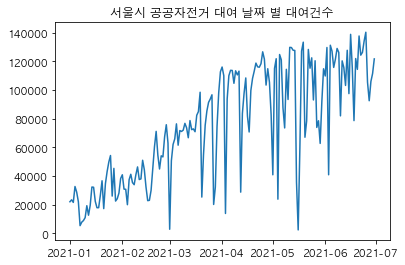

In [38]:

plt.plot(df_count.index, df_count.values)


plt.title('서울시 공공자전거 대여 날짜 별 대여건수')
plt.show()

## 대여 날짜 별 이용시간

In [41]:
# 대여날짜 별 이용시간 추출

df_time = df.groupby('대여날짜')['이용시간'].sum().to_frame()

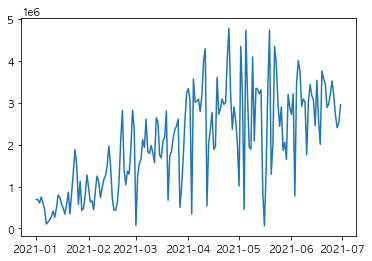

In [42]:
plt.plot(df_time.index, df_time['이용시간'])
plt.show()

## 대여날짜 별 이용거리

In [43]:
df_distance = df.groupby('대여날짜')['이용거리'].sum().to_frame()

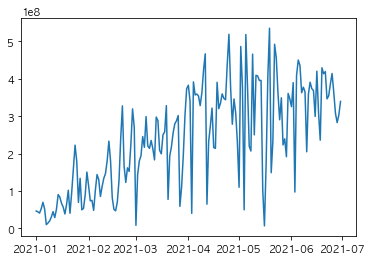

In [44]:
plt.plot(df_distance.index, df_distance['이용거리'])
plt.show()

## 데이터 프레임 합치기

In [46]:
df_date = pd.concat([df_time, df_distance, df_count], axis=1)
df_date

,이용시간,이용거리,대여건수
대여날짜,,,
2021-01-01,692309.0,4.613529e+07,22119
2021-01-02,686580.0,4.409618e+07,23463
2021-01-03,609571.0,4.059830e+07,21656
2021-01-04,750721.0,5.249645e+07,32732
2021-01-05,610227.0,6.944856e+07,28819
...,...,...,...
2021-06-26,3168288.0,3.635015e+08,105414
2021-06-27,2706168.0,3.078146e+08,92486
2021-06-28,2405249.0,2.828124e+08,105882


## 시간대별 대여/반납 현황

In [47]:
df['대여시간'] = df['대여일시'].dt.hour

In [48]:
df['반납시간'] = df['반납일시'].dt.hour

In [49]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [53]:
s_rental = df['대여시간'].value_counts()
s_rental
# 자동으로 값이 높은 순으로 출력된다

18    1432779
17    1178279
19     984476
16     934211
20     825031
15     816040
8      808506
21     770378
14     725175
13     667237
22     643611
12     623065
11     537810
9      499995
7      486775
10     438084
23     341859
0      240025
6      188920
1      158905
2      103629
5       84713
3       68710
4       55391
Name: 대여시간, dtype: int64

In [54]:
s_return = df['반납시간'].value_counts()
s_return

18    1437723
19    1125447
17    1097623
16     880629
20     864644
8      817076
21     812357
22     768302
15     749940
14     657826
13     628908
12     591577
9      499033
11     470053
23     447477
10     402350
7      389007
0      290169
1      190954
6      152003
2      125912
3       80243
5       73983
4       60368
Name: 반납시간, dtype: int64

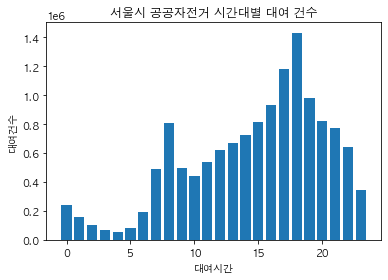

In [57]:
s_rental = s_rental.sort_index()

x = s_rental.index
y = s_rental.values
plt.bar(x,y)
plt.title('서울시 공공자전거 시간대별 대여 건수')
plt.xlabel('대여시간')
plt.ylabel('대여건수')
plt.show()
# 인덱스로 정렬

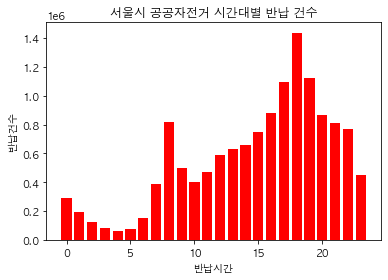

In [60]:
s_return = s_return.sort_index()
s_return
x = s_return.index
y = s_return.values
plt.title('서울시 공공자전거 시간대별 반납 건수')
plt.xlabel('반납시간')
plt.ylabel('반납건수')
plt.bar(x,y,color = 'r')
plt.show()

# 대여소별 대여/반납 현황

In [61]:
# 대여 대여소번호 갯수

df['대여 대여소번호']

0             3
1             3
2             3
3             3
4             3
           ... 
3445939     152
3445940     152
3445941     152
3445942    2220
3445943    2220
Name: 대여 대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [62]:
df['반납대여소번호']

0            668
1            668
2            668
3            668
4            540
           ...  
3445939    00126
3445940    00437
3445941    00437
3445942    02526
3445943    02526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [63]:
df['반납대여소번호'] = df['반납대여소번호'].astype('str')

In [64]:
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')

In [65]:
df['반납대여소번호'] = df['반납대여소번호'].astype('int')

In [66]:
df['반납대여소번호'] = df['반납대여소번호'].astype('category')


In [67]:
df['반납대여소번호']

0           668
1           668
2           668
3           668
4           540
           ... 
3445939     126
3445940     437
3445941     437
3445942    2526
3445943    2526
Name: 반납대여소번호, Length: 13613604, dtype: category
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [70]:
df[['대여 대여소번호', '대여 대여소명']].value_counts()[:10].to_frame()

,,0
대여 대여소번호,대여 대여소명,
207,여의나루역 1번출구 앞,68994
502,뚝섬유원지역 1번출구 앞,68588
152,마포구민체육센터 앞,43535
2102,봉림교 교통섬,43368
1210,롯데월드타워(잠실역2번출구 쪽),37149
2715,마곡나루역 2번 출구,36988
2177,신대방역 2번 출구,31971
272,당산육갑문,31527
210,IFC몰,31443


In [71]:
df[['반납대여소번호', '반납대여소명']].value_counts()[:10].to_frame()

,,0
반납대여소번호,반납대여소명,
502,뚝섬유원지역 1번출구 앞,78958
207,여의나루역 1번출구 앞,68966
152,마포구민체육센터 앞,50607
2102,봉림교 교통섬,44572
1210,롯데월드타워(잠실역2번출구 쪽),37344
2715,마곡나루역 2번 출구,36876
272,당산육갑문,34276
210,IFC몰,33758
2177,신대방역 2번 출구,33159


## 여의나루역 1번출구 앞 대여소 이용현황

In [72]:
df_207 = df[df['대여 대여소번호'] == 207]

df_207.head(1)

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.0,2021-01-01,1,1


In [74]:
# 대여한곳에서 반납한다는 것을 알 수 있음

df_207[['반납대여소번호','반납대여소명']].value_counts().to_frame()

,,0
반납대여소번호,반납대여소명,
207,여의나루역 1번출구 앞,18347
202,국민일보 앞,2006
222,시범아파트버스정류장 옆,1588
249,여의도중학교 옆,1525
272,당산육갑문,1269
...,...,...
2414,도곡역 아카데미스위트 앞,1
669,청계한신휴플러스앞 삼거리,1
1661,당현천근린공원,1


###  요일별 대여현황

In [79]:
df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')

/var/folders/vt/jhkhj2gs47q5fn16r45zqzpw0000gn/T/ipykernel_95121/213675838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_207['대여요일'] = df_207['대여일시'].dt.strftime('%a')


In [80]:
df_207

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,대여날짜,대여시간,반납시간,대여요일
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1,Fri
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4,Fri
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9,Fri
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11,Fri
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0,Wed
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0,Wed
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0,Wed
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0,Wed


In [81]:
df_207['대여요일'].value_counts()

Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8037
Tue     7235
Name: 대여요일, dtype: int64

In [88]:
# 여의나루 이용시간

df_207['이용시간'].mean()

50.28551344300312

In [83]:
df_207['이용시간'].max()

1268.0

In [84]:
df_207['이용시간'].min()

1.0

In [87]:
# 전체 이용시간


df['이용시간'].mean()

27.27823322905529